In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To build linear regression_model
import statsmodels.api as sm

# scikit-learn library, which provides a range of preprocessing utilities, including the LabelEncoder class
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Question 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

*   Read the data

In [3]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Supervised Learning Proj/compactiv.xlsx')

 *   There are 8192 rows and 22 columns in this dataset.




In [4]:
data.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


*  Check the data types




In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6


*   There are attributes of different types (int, float, object) in the
data.  

*  Out of 22 columns, 13 are of float64 type, 8 are of int64 type and 1 is of type object.


                                                                  
    


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lread,8192.0,NaN,NaN,NaN,19.559692,53.353799,0.0,2.0,7.0,20.0,1845.0
lwrite,8192.0,NaN,NaN,NaN,13.106201,29.891726,0.0,0.0,1.0,10.0,575.0
scall,8192.0,NaN,NaN,NaN,2306.318237,1633.617322,109.0,1012.0,2051.5,3317.25,12493.0
sread,8192.0,NaN,NaN,NaN,210.47998,198.980146,6.0,86.0,166.0,279.0,5318.0
swrite,8192.0,NaN,NaN,NaN,150.058228,160.47898,7.0,63.0,117.0,185.0,5456.0
fork,8192.0,NaN,NaN,NaN,1.884554,2.479493,0.0,0.4,0.8,2.2,20.12
exec,8192.0,NaN,NaN,NaN,2.791998,5.212456,0.0,0.2,1.2,2.8,59.56
rchar,8088.0,NaN,NaN,NaN,197385.728363,239837.493526,278.0,34091.5,125473.5,267828.75,2526649.0
wchar,8177.0,NaN,NaN,NaN,95902.992785,140841.707911,1498.0,22916.0,46619.0,106101.0,1801623.0
pgout,8192.0,NaN,NaN,NaN,2.285317,5.307038,0.0,0.0,0.0,2.4,81.44


Shape of the dataset

In [7]:
data.shape

(8192, 22)

EDA (Exploratory Data Analysis)

Univariant Analysis

In [8]:
numeric_columns = data.select_dtypes(['int','float']).columns
numeric_columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

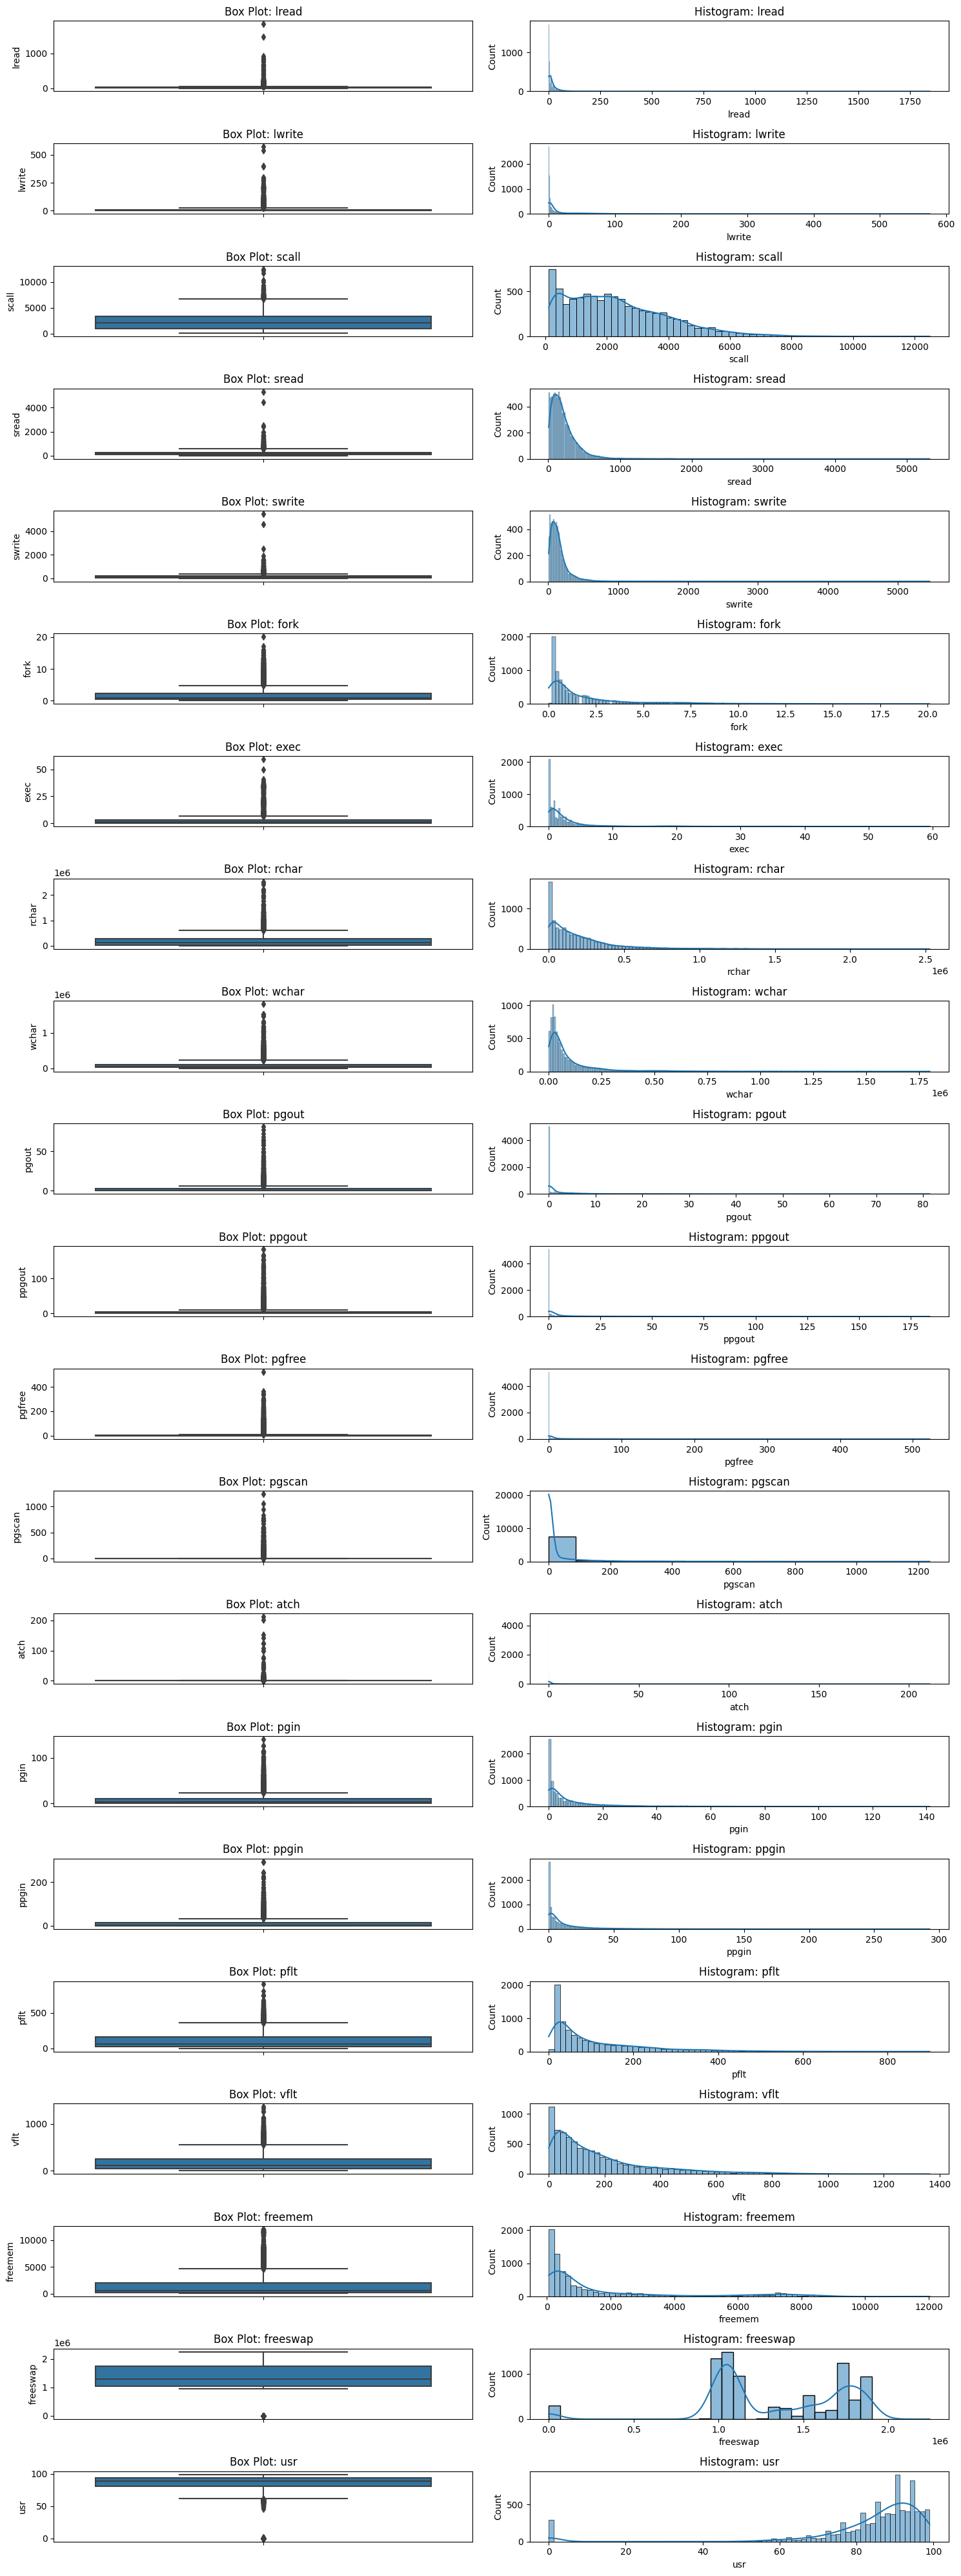

In [9]:
plt.figure(figsize=(15,40))
c = 1
for i in numeric_columns:
    plt.subplot(21,2,c)
    sns.boxplot(data=data, y=i)
    plt.title(f'Box Plot: {i}')
    plt.subplot(21,2,c+1)
    sns.histplot(data=data, x=i, kde=True)
    plt.title(f'Histogram: {i}')
    c += 2

plt.tight_layout();

There are outliers in almost all the cases. The outliers are not treated here, as the models may lose out on generalization.

Insights from the univariant analysis:

*   lread varies from 0 to 1845 s. Average value is 19.55 s.
*   lread varies from 0 to 1845 s. Average value is 19.55 s.
*   lwrite varies from 0 to 575. Average value is 13.10 s.
*   scall varies from 109 to 12493. Average value is 2306.32 s.
*   sread varies from 6 to 5318. Average value is 210.48 s.
*   swrite varies from 7 to 5456. Average value is 150.06 s.
*   fork varies from 0 to 20.12. Average value is 1.89 s.
*   exec varies from 0 to 59.56. Average value is 2.79 s.
*   rchar varies from 278 to 2526649. Average value is 197385.73 s.
*   wchar varies from 1498 to 1801623. Average value is 95902.99 s.
*   pgout varies from 0 to 81.44. Average value is 2.29 s.
*   ppgout varies from 0 to 184.2. Average value is 5.98 s.
*   pgfree varies from 0 to 523. Average value is 11.92 s.
*   pgscan varies from 0 to 1237. Average value is 21.53 s.
*   atch varies from 0 to 211.58. Average value is 1.13 s.
*   pgin varies from 0 to 141.2. Average value is 8.28 s.
*   ppgin varies from 0 to 292.61. Average value is 12.39 s.
*   pflt varies from 0 to 899.8. Average value is 109.80.
*   vflt varies from 0.2 to 1365. Average value is 185.32.
*   runqsz takes one of the 2 values namely - CPU_Bound, Not_CPU_Bound.
*   freemem varies from 55 to 12027. Average is 1763.46.
*   freeswap varies from 2 to 2243187. Average is 1328125.96.
*   usr varies from 0 to 99. Average is 83.97 %.

Most of the independent variables are left skewed (except freeswap).
The dependent variable (usr) is right skewed.

<Axes: xlabel='runqsz', ylabel='usr'>

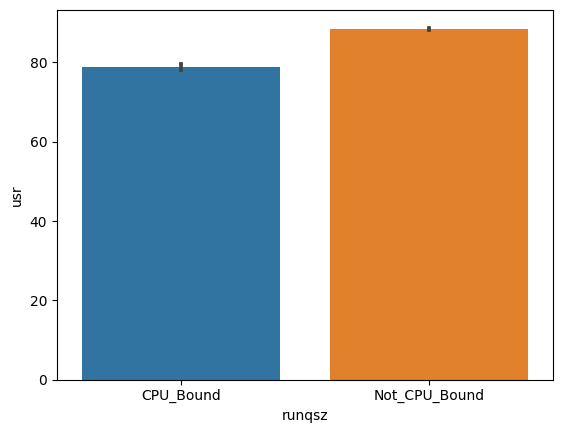

In [10]:
#Univariant Analysis of categorical variable - runqsz with the dependent variable 'usr'
sns.barplot(data=data,x="runqsz", y="usr")

In [11]:
data['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

The count of 'runqsz' - 'Not_CPU_Bound' is slightly higher than 'CPU_Bound'.

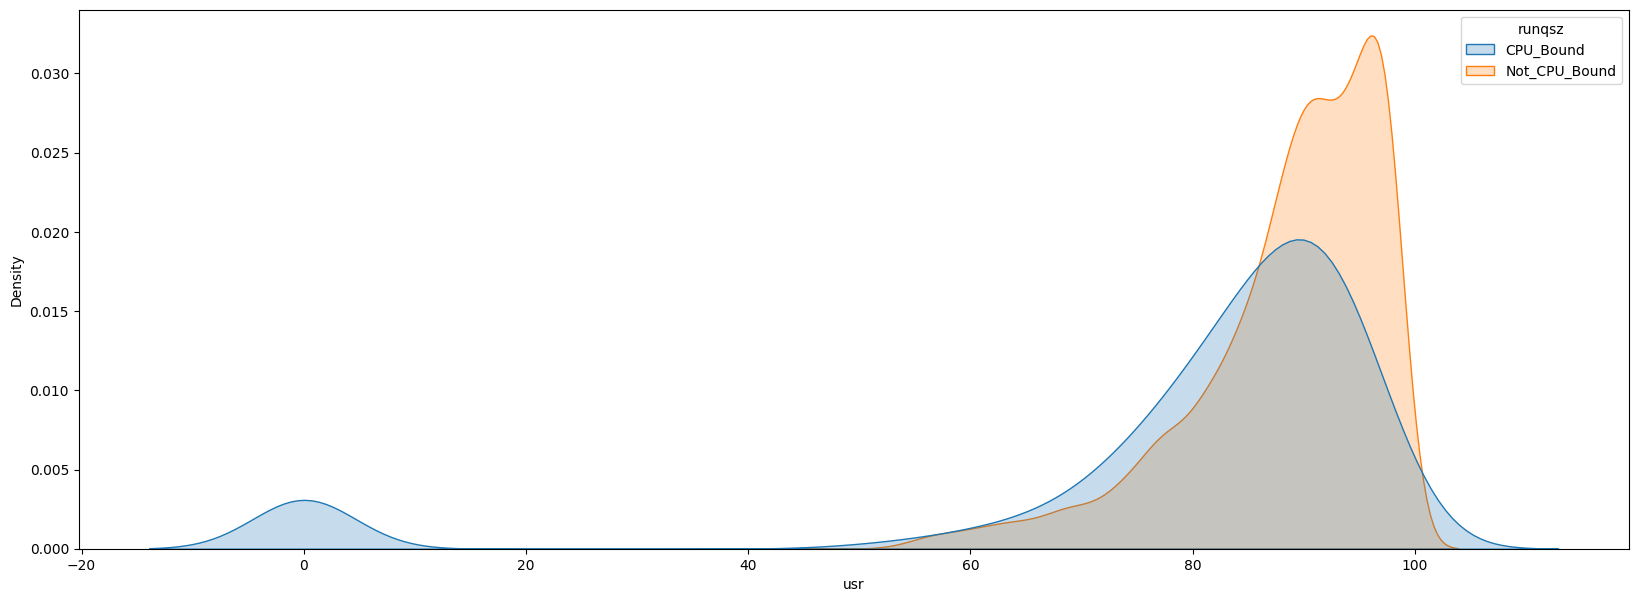

In [12]:
plt.figure(figsize=(20,7))
sns.kdeplot(data=data, x='usr', hue='runqsz', fill=True);


When user mode is running between 80 to 90% of time, it is majorly a non CPU bound operation.  
This variable might not be helpful, in predicting the target.

Bivariant analysis - Correlation map to find the relation between 2 variables across the dataset.

In [13]:
data.corr()

<ipython-input-13-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
lread,1.000000,0.533737,0.191377,0.132881,0.119953,0.140284,0.110965,0.107973,0.081571,0.082463,0.130590,0.114438,0.087783,0.021563,0.189799,0.161345,0.137463,0.165539,-0.083214,-0.081293,-0.141394
lwrite,0.533737,1.000000,0.143404,0.128403,0.101524,0.052511,0.038237,0.115121,0.091718,0.067013,0.079485,0.065692,0.042608,0.028310,0.091068,0.089011,0.067024,0.094965,-0.091133,-0.116478,-0.111213
scall,0.191377,0.143404,1.000000,0.696887,0.619984,0.446766,0.308999,0.351413,0.274092,0.194529,0.208400,0.199778,0.177908,0.077969,0.241628,0.219070,0.481781,0.531760,-0.387520,-0.350629,-0.323188
sread,0.132881,0.128403,0.696887,1.000000,0.881069,0.416721,0.164084,0.502397,0.401784,0.193679,0.225906,0.212911,0.194272,0.085468,0.207012,0.210225,0.452020,0.491045,-0.286437,-0.302036,-0.332160
swrite,0.119953,0.101524,0.619984,0.881069,1.000000,0.376876,0.103643,0.331386,0.394230,0.151371,0.159442,0.145458,0.120180,0.061373,0.147000,0.144278,0.396580,0.416571,-0.248574,-0.237062,-0.272252
fork,0.140284,0.052511,0.446766,0.416721,0.376876,1.000000,0.763974,0.281229,0.060790,0.130192,0.166872,0.168082,0.160839,0.047194,0.163468,0.132181,0.931040,0.939348,-0.123357,-0.130442,-0.363277
exec,0.110965,0.038237,0.308999,0.164084,0.103643,0.763974,1.000000,0.169189,0.000547,0.111465,0.149334,0.146163,0.144855,0.052307,0.186099,0.149911,0.645239,0.691754,-0.158565,-0.153347,-0.288526
rchar,0.107973,0.115121,0.351413,0.502397,0.331386,0.281229,0.169189,1.000000,0.503531,0.211268,0.269160,0.277786,0.259446,0.171532,0.299784,0.347224,0.313246,0.363799,-0.149485,-0.220608,-0.329737
wchar,0.081571,0.091718,0.274092,0.401784,0.394230,0.060790,0.000547,0.503531,1.000000,0.192436,0.188876,0.159229,0.113638,0.181408,0.178290,0.200880,0.086128,0.111082,-0.149060,-0.226044,-0.288974
pgout,0.082463,0.067013,0.194529,0.193679,0.151371,0.130192,0.111465,0.211268,0.192436,1.000000,0.872445,0.730381,0.553916,0.147759,0.385648,0.414865,0.151285,0.229129,-0.269687,-0.245378,-0.221877


<ipython-input-14-e398165b953c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(),annot=True);


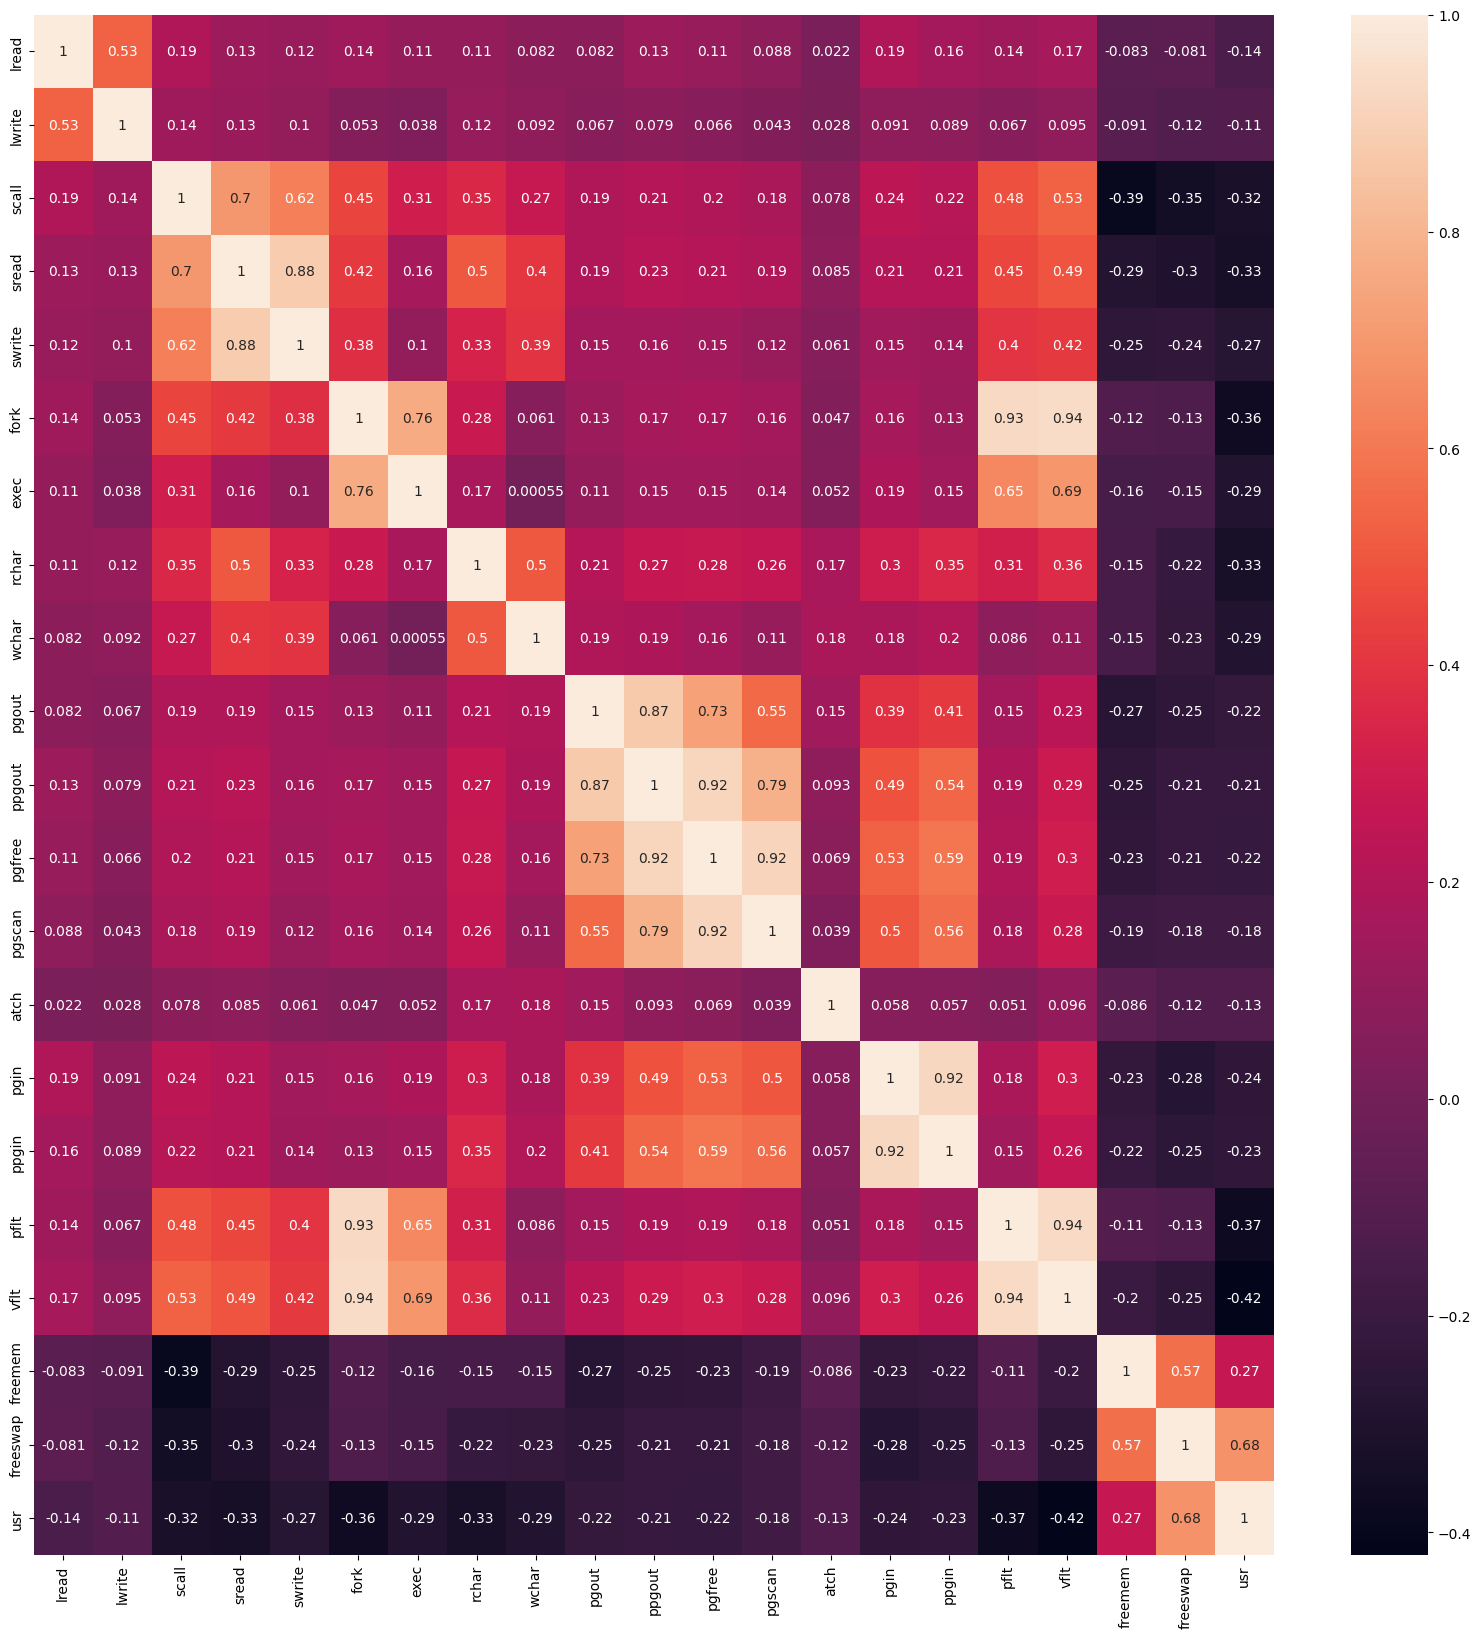

In [14]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
ax = sns.heatmap(data.corr(),annot=True);

There are various variables that have a strong correlation between them, hence need to find out the columns that have a correlation > 0.7

In [15]:
data.corr()[abs(data.corr())>0.7]

<ipython-input-15-47cb458a3b52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()[abs(data.corr())>0.7]


,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
lread,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lwrite,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scall,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sread,NaN,NaN,NaN,1.000000,0.881069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
swrite,NaN,NaN,NaN,0.881069,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fork,NaN,NaN,NaN,NaN,NaN,1.000000,0.763974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93104,0.939348,NaN,NaN,NaN
exec,NaN,NaN,NaN,NaN,NaN,0.763974,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rchar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wchar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pgout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.872445,0.730381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Strong correlated variables are -
*   sread and swrite
*   fork and exec
*   pgout and ppgout
*   pgout and pgfree
*   ppgout and pgfree
*   ppgout and pgscan
*   pgin and ppgin
*   pflt and vflt

There is clearly a multi colinearity problem in the dataset.

<Axes: xlabel='freeswap', ylabel='usr'>

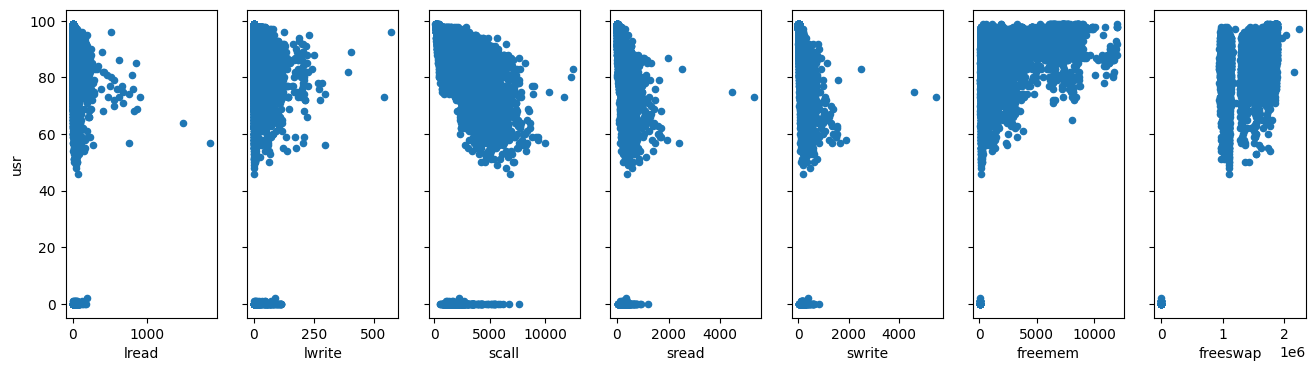

In [16]:
### Bivariant analysis of the numeric variables (int) - lread','lwrite','scall','sread','swrite','freemem','freeswap' with the variable 'usr'
fig, axes = plt.subplots(1, 7, sharey=True)
data.plot(kind='scatter', x='lread', y='usr', ax=axes[0], figsize=(16, 4))
data.plot(kind='scatter', x='lwrite', y='usr', ax=axes[1])
data.plot(kind='scatter', x='scall', y='usr', ax=axes[2])
data.plot(kind='scatter', x='sread', y='usr', ax=axes[3])
data.plot(kind='scatter', x='swrite', y='usr', ax=axes[4])
data.plot(kind='scatter', x='freemem', y='usr', ax=axes[5])
data.plot(kind='scatter', x='freeswap', y='usr', ax=axes[6])

In [17]:
# Correlation of all numerical variables (int) - 'lread','lwrite','scall','sread','swrite','freemem','freeswap' with the variable 'usr'
corr1=data['lread'].corr(data['usr'])
print("lread and usr corr is ",corr1)
corr2 = data['lwrite'].corr(data['usr'])
print("lwrite and usr corr is ",corr2)
corr3 = data['scall'].corr(data['usr'])
print("scall and usr corr is ",corr3)
corr4 = data['sread'].corr(data['usr'])
print("sread and usr corr is ",corr4)
corr5 = data['swrite'].corr(data['usr'])
print("swrite and usr corr is ",corr5)
corr6 = data['freemem'].corr(data['usr'])
print("freemem and usr corr is ",corr6)
corr7 = data['freeswap'].corr(data['usr'])
print("freeswap and usr corr is ",corr7)

lread and usr corr is  -0.14139389688467285
lwrite and usr corr is  -0.11121341485022547
scall and usr corr is  -0.3231884096869675
sread and usr corr is  -0.33215995802851617
swrite and usr corr is  -0.2722518116362138
freemem and usr corr is  0.27030831190910853
freeswap and usr corr is  0.6785262417399952


*   From the above details, the variables freeswap and usr are moderately positively correlated.
*   Fields - freemem and usr have a very weak correlation.
*   Also, notice that the remaining fields namely - lread, lwrite, scall, sread and swrite are negatively correlated with the dependent variable.


  

<Axes: xlabel='vflt', ylabel='usr'>

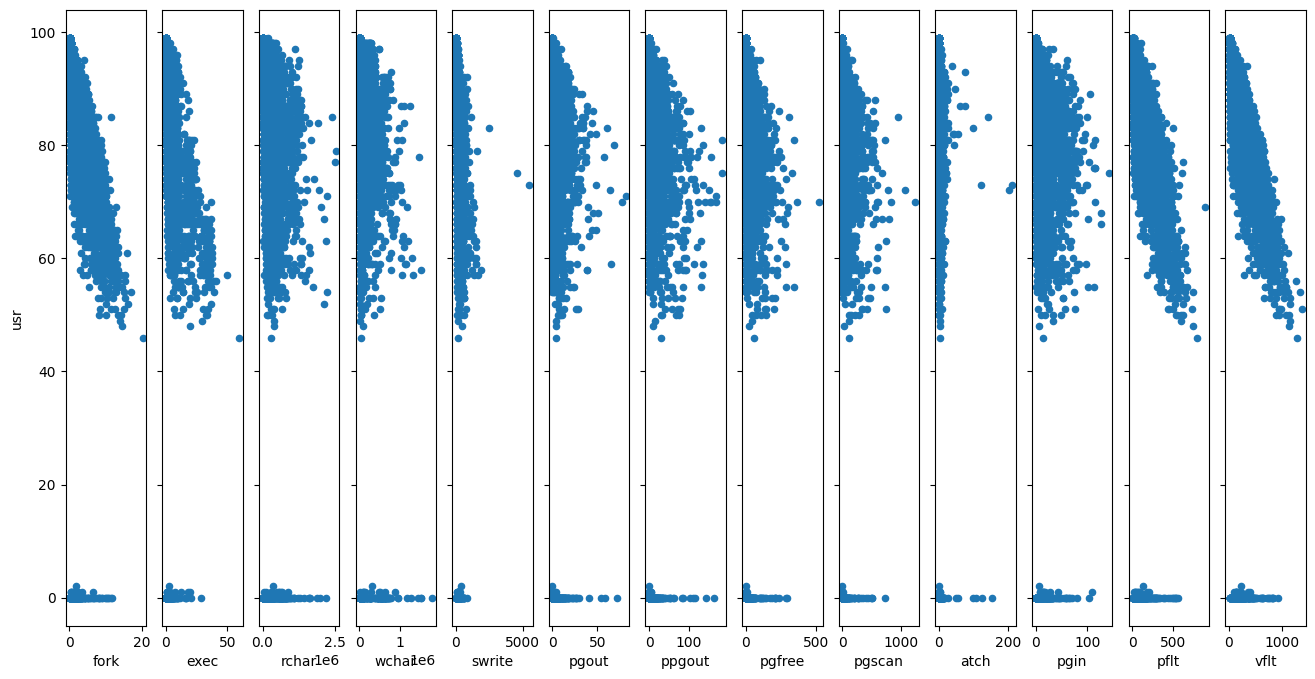

In [18]:
### Bivariant analysis of the numeric independent variables (float) - fork, exec, rchar, wchar, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, pflt, vflt  with the dependent variable 'usr'
fig, axes = plt.subplots(1, 13, sharey=True)
data.plot(kind='scatter', x='fork', y='usr', ax=axes[0], figsize=(16, 8))
data.plot(kind='scatter', x='exec', y='usr', ax=axes[1])
data.plot(kind='scatter', x='rchar', y='usr', ax=axes[2])
data.plot(kind='scatter', x='wchar', y='usr', ax=axes[3])
data.plot(kind='scatter', x='swrite', y='usr', ax=axes[4])
data.plot(kind='scatter', x='pgout', y='usr', ax=axes[5])
data.plot(kind='scatter', x='ppgout', y='usr', ax=axes[6])
data.plot(kind='scatter', x='pgfree', y='usr', ax=axes[7])
data.plot(kind='scatter', x='pgscan', y='usr', ax=axes[8])
data.plot(kind='scatter', x='atch', y='usr', ax=axes[9])
data.plot(kind='scatter', x='pgin', y='usr', ax=axes[10])
data.plot(kind='scatter', x='pflt', y='usr', ax=axes[11])
data.plot(kind='scatter', x='vflt', y='usr', ax=axes[12])

In [19]:
# Correlation of all numerical independent variables (float) - fork, exec, rchar, wchar, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, pflt, vflt  with the dependent variable 'usr'
corr1=data['fork'].corr(data['usr'])
print("fork and usr corr is ",corr1)
corr2 = data['exec'].corr(data['usr'])
print("exec and usr corr is ",corr2)
corr3 = data['rchar'].corr(data['usr'])
print("rchar and usr corr is ",corr3)
corr4 = data['wchar'].corr(data['usr'])
print("wchar and usr corr is ",corr4)
corr5 = data['pgout'].corr(data['usr'])
print("pgout and usr corr is ",corr5)
corr6 = data['ppgout'].corr(data['usr'])
print("ppgout and usr corr is ",corr6)
corr7 = data['pgfree'].corr(data['usr'])
print("pgfree and usr corr is ",corr7)
corr8=data['pgscan'].corr(data['usr'])
print("pgscan and usr corr is ",corr8)
corr9 = data['atch'].corr(data['usr'])
print("atch and usr corr is ",corr9)
corr10 = data['pgin'].corr(data['usr'])
print("pgin and usr corr is ",corr10)
corr11 = data['ppgin'].corr(data['usr'])
print("ppgin and usr corr is ",corr11)
corr12 = data['pflt'].corr(data['usr'])
print("pflt and usr corr is ",corr12)
corr13 = data['vflt'].corr(data['usr'])
print("vflt and usr corr is ",corr13)

fork and usr corr is  -0.3632768833634806
exec and usr corr is  -0.2885262168273979
rchar and usr corr is  -0.3297373412099098
wchar and usr corr is  -0.28897361772639185
pgout and usr corr is  -0.22187681320269698
ppgout and usr corr is  -0.21229458749761684
pgfree and usr corr is  -0.21627809168038353
pgscan and usr corr is  -0.18148800962245146
atch and usr corr is  -0.1250742154056606
pgin and usr corr is  -0.24171963028135585
ppgin and usr corr is  -0.23368239114707406
pflt and usr corr is  -0.37249475603039295
vflt and usr corr is  -0.420685309741213



*   From the above details, we see that almost all the float variables are negatively correlated with the independent variable.




Pairplot for the dataset

In [20]:
plt.figure(figsize=(20,7))
sns.pairplot(data=data[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr']])

Output hidden; open in https://colab.research.google.com to view.

Multivariate Analysis

<Axes: xlabel='sread', ylabel='usr'>

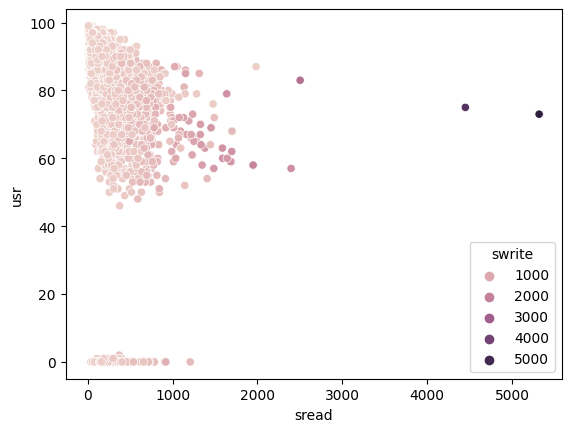

In [21]:
sns.scatterplot(x="sread", y="usr",
                   hue="swrite", data=data)

*   This graph shows that max sread and swrite happens between 60 to 100% of the time that cpu runs in user mode.
*   Most of the sread and swrite operations are performed within the 0 to 1000s.



<Axes: xlabel='pflt', ylabel='usr'>

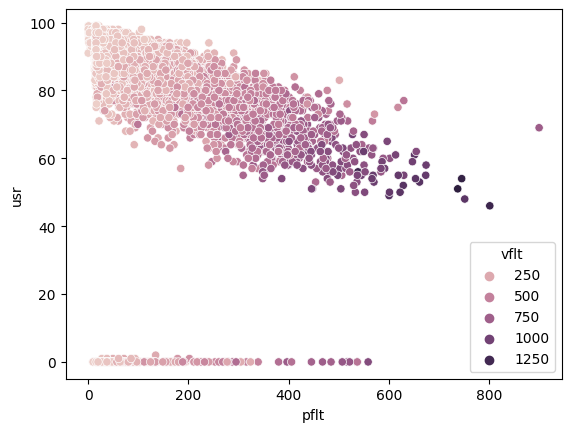

In [22]:
sns.scatterplot(x="pflt", y="usr",
                   hue="vflt", data=data)

*   pflt - Number of page faults caused by protection errors (copy-on-writes).
*   vflt - Number of page faults caused by address translation.
*   This graph shows that max pflt and vflt happens between 60 to 100% of the time that cpu runs in user mode.
*   There are some cases of pflt and vflt reported, when the usr is 0%.

<Axes: xlabel='ppgout', ylabel='usr'>

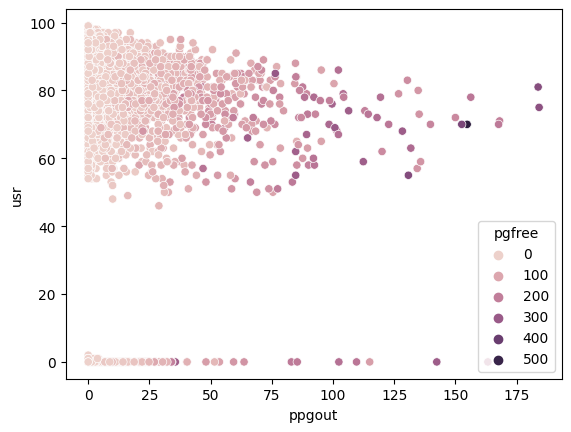

In [23]:
sns.scatterplot(x="ppgout", y="usr",
                   hue="pgfree", data=data)

*   ppgout - Number of pages, paged out per second
*   pgfree - Number of pages per second placed on the free list.
*   This graph shows that max ppgout and pgfree happens between 60 to 100% of the time that cpu runs in user mode.
*   There are some cases of ppgout and pgfree reported, when the usr is 0%.

5 point summary - This is already covered above, where the box plots have been illustrated.

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

Check if there are null values

In [24]:
data.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

Yes, there are null values in the fields namely rchar and wchar. There are around 104 null values in rchar and 15 null values in wchar respectively.

It is required to impute both the rchar and wchar with medians of their respective columns. In the heat map, it is shown that these 2 fields do not have any strong correlation with any other fields.

In [25]:
data['rchar'].median()

125473.5

In [26]:
data['wchar'].median()

46619.0

Imputing the values

In [27]:
data['rchar'].fillna(data['rchar'].median(), inplace = True)

In [28]:
data['wchar'].fillna(data['wchar'].median(), inplace = True)

In [29]:
data.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,125473.5,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [30]:
data.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

Check for outliers - This has been explained above.

Check for duplicates

In [31]:
data.duplicated().sum()

0

There are no duplicate values.

To check for 0 values in the various columns.

In [32]:
lread0 = data['lread'].isin([0]).value_counts()

In [34]:
print(lread0)

False    7517
True      675
Name: lread, dtype: int64


lread0 has 675 rows, where the value is 0.
lread - Reads (transfers per second ) between system memory and user memory.
If this value is 0, we shall keep it as it is, as this does not have any strong correlation with any of the other variables.
The system can be idle for sometime, so having 0 in some rows is acceptable.

In [33]:
lwrite0 = data['lwrite'].isin([0]).value_counts()

In [35]:
print(lwrite0)

False    5508
True     2684
Name: lwrite, dtype: int64


lwrite0 has 2684 rows, where the value is 0. lwrite - writes (transfers per second) between system memory and user memory. If this value is 0, we shall keep it as it is, as this does not have any strong correlation with any of the other variables.The system can be idle for sometime, so having 0 in some rows is acceptable.

In [36]:
lfork0 = data['fork'].isin([0]).value_counts()

In [37]:
print(lfork0)

False    8171
True       21
Name: fork, dtype: int64


fork0 has just 21 rows, where the value is 0. fork - Number of system fork calls per second. If this value is 0, we shall keep it as it is, as it is very few rows, out of the total dataset.

In [38]:
lexec0 = data['exec'].isin([0]).value_counts()

In [39]:
print(lexec0)

False    8171
True       21
Name: exec, dtype: int64


exec0 has just 21 rows, where the value is 0. exec - Number of system exec calls per second. If this value is 0, we shall keep it as it is, as it is very few rows, out of the total dataset.

In [40]:
pgout0 = data['pgout'].isin([0]).value_counts()

In [41]:
print(pgout0)

True     4878
False    3314
Name: pgout, dtype: int64


The system can be idle for sometime, so having 0 in some rows is acceptable.

In [42]:
ppgout0 = data['ppgout'].isin([0]).value_counts()

In [43]:
print(ppgout0)

True     4878
False    3314
Name: ppgout, dtype: int64


The system can be idle for sometime, so having 0 in some rows is acceptable.

In [44]:
pgfree0 = data['pgfree'].isin([0]).value_counts()

In [45]:
print(pgfree0)

True     4869
False    3323
Name: pgfree, dtype: int64


The system can be idle for sometime, so having 0 in some rows is acceptable.

The other fields namely - pgscan, atch, pgin, ppgin and pflt also have 0 values in some rows. This can be attributed to idle system time. Hence, we would keep all the 0 values.

There is no possibility of a new feature to be introduced here.
Each and every variable has a specific meaning. Eg: rchar and wchar - in case we merge them, they would lose their individual values. If the user only reads, then in case of merging both the fields, we get a partial value. We would not be able to separate out the read intensive / write intensive operations by the user.

1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

Encode the data (having string values) for Modelling.
Here, the categorical variable - runqsz, needs to be encoded.
That is done by the pd.get_dummies() function.

In [46]:
data.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,125473.5,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [47]:
data = pd.get_dummies(data, columns=["runqsz"], drop_first=True)

In [48]:
data.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,95,0
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,97,1
2,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,87,1
3,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,98,1
4,5,1,330,39,38,0.4,0.4,125473.5,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,90,1


In [49]:
# independent variables
x = data.drop(["usr"], axis=1)
# dependent variable
y = data[["usr"]]

In [50]:
x.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,0
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,1
2,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,1
3,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,1
4,5,1,330,39,38,0.4,0.4,125473.5,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,1


In [51]:
y.head()

,usr
0,95
1,97
2,87
3,98
4,90


In [52]:
# let's add the intercept to data - Adding the constant for OLS
x = sm.add_constant(x)

In [53]:
x.head()

,const,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
0,1.0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,0
1,1.0,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,1
2,1.0,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,1
3,1.0,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,1
4,1.0,5,1,330,39,38,0.4,0.4,125473.5,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,1


Split the data into train and test sets (70:30).

In [54]:
#Using this split for OLS
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5734, 22)
(2458, 22)
(5734, 1)
(2458, 1)


In [56]:
x_train.head()

,const,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
6781,1.0,1,1,2078,94,97,0.40,0.40,30254.0,10055.0,0.20,0.20,0.20,0.0,0.00,1.00,1.40,23.80,40.00,313,1716179,0
6762,1.0,164,18,4432,573,222,5.99,8.58,386448.0,38136.0,38.12,92.42,222.16,397.6,3.99,27.15,29.74,416.77,840.72,132,972691,0
1308,1.0,7,3,2304,99,69,0.60,0.60,146483.0,27071.0,0.00,0.00,0.00,0.0,0.00,1.00,1.60,57.60,52.20,6239,1721694,0
4086,1.0,25,36,1039,112,45,0.80,1.20,243641.0,36586.0,0.00,0.00,0.00,0.0,0.00,1.80,3.20,66.80,108.40,581,1749042,1
1621,1.0,2,0,386,42,14,2.20,2.20,92461.0,20544.0,0.00,0.00,0.00,0.0,0.00,2.20,4.00,208.80,178.00,9145,1879085,1


In [57]:
x_test.head()

,const,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
5455,1.0,2,0,817,43,73,0.4,0.8,102203.0,26343.0,0.0,0.0,0.0,0.0,0.2,2.00,2.20,34.40,47.60,494,1014829,1
152,1.0,5,3,3694,611,520,2.4,2.2,723819.0,282690.0,2.0,2.0,2.0,0.0,0.8,52.91,103.61,111.82,234.87,502,1132314,1
6394,1.0,0,0,820,157,68,0.4,0.4,212904.0,156341.0,0.0,0.0,0.0,0.0,0.0,2.40,4.00,33.80,39.80,1063,1753798,0
7509,1.0,2,0,2560,286,237,0.8,3.6,218944.0,233957.0,0.0,0.0,0.0,0.0,0.0,26.20,52.40,39.60,54.60,3274,1737648,0
6343,1.0,12,18,1207,280,200,0.2,0.2,13777.0,74406.0,2.8,3.4,3.4,0.0,0.0,2.00,2.00,15.20,28.20,236,1708720,0


In [58]:
y_train.head()

,usr
6781,95
6762,58
1308,92
4086,87
1621,88


In [59]:
y_test.head()

,usr
5455,96
152,76
6394,95
7509,83
6343,92


Apply Linear regression using scikit learn.

Using this split the data into 70:30 for scikit learn linear regression

In [60]:
x_sktrain, x_sktest, y_sktrain, y_sktest = train_test_split(x,y,test_size = 0.3, random_state = 123)

In [61]:
print(x_sktrain.shape)
print(x_sktest.shape)
print(y_sktrain.shape)
print(y_sktest.shape)

(5734, 22)
(2458, 22)
(5734, 1)
(2458, 1)


In [62]:
x_sktrain.head()

,const,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
6781,1.0,1,1,2078,94,97,0.40,0.40,30254.0,10055.0,0.20,0.20,0.20,0.0,0.00,1.00,1.40,23.80,40.00,313,1716179,0
6762,1.0,164,18,4432,573,222,5.99,8.58,386448.0,38136.0,38.12,92.42,222.16,397.6,3.99,27.15,29.74,416.77,840.72,132,972691,0
1308,1.0,7,3,2304,99,69,0.60,0.60,146483.0,27071.0,0.00,0.00,0.00,0.0,0.00,1.00,1.60,57.60,52.20,6239,1721694,0
4086,1.0,25,36,1039,112,45,0.80,1.20,243641.0,36586.0,0.00,0.00,0.00,0.0,0.00,1.80,3.20,66.80,108.40,581,1749042,1
1621,1.0,2,0,386,42,14,2.20,2.20,92461.0,20544.0,0.00,0.00,0.00,0.0,0.00,2.20,4.00,208.80,178.00,9145,1879085,1


In [63]:
x_sktest.head()

,const,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
5455,1.0,2,0,817,43,73,0.4,0.8,102203.0,26343.0,0.0,0.0,0.0,0.0,0.2,2.00,2.20,34.40,47.60,494,1014829,1
152,1.0,5,3,3694,611,520,2.4,2.2,723819.0,282690.0,2.0,2.0,2.0,0.0,0.8,52.91,103.61,111.82,234.87,502,1132314,1
6394,1.0,0,0,820,157,68,0.4,0.4,212904.0,156341.0,0.0,0.0,0.0,0.0,0.0,2.40,4.00,33.80,39.80,1063,1753798,0
7509,1.0,2,0,2560,286,237,0.8,3.6,218944.0,233957.0,0.0,0.0,0.0,0.0,0.0,26.20,52.40,39.60,54.60,3274,1737648,0
6343,1.0,12,18,1207,280,200,0.2,0.2,13777.0,74406.0,2.8,3.4,3.4,0.0,0.0,2.00,2.00,15.20,28.20,236,1708720,0


In [64]:
y_sktrain.head()

,usr
6781,95
6762,58
1308,92
4086,87
1621,88


In [65]:
y_sktest.head()

,usr
5455,96
152,76
6394,95
7509,83
6343,92


Apply Linear regression using scikit learn.

In [66]:
linregsk = LinearRegression()
linregsk.fit( x_sktrain, y_sktrain )#fit model on train data

LinearRegression()

In [67]:
linregsk.intercept_ #intercept of the model

array([40.91871287])

In [68]:
linregsk.coef_ #co-efficient of each dependant variable

array([[ 0.00000000e+00, -2.00907136e-02,  7.54223130e-03,
         9.48347297e-04,  7.76397886e-04, -1.37048518e-03,
        -1.95902796e+00, -7.77074449e-03, -3.58025820e-06,
        -8.73552125e-06, -1.92444878e-01,  1.46693589e-01,
        -1.05131055e-01,  1.60555409e-02, -5.22497285e-02,
         5.77837657e-02, -3.80869667e-02, -3.95719448e-02,
         2.24758172e-02, -1.77175474e-03,  3.44969262e-05,
         8.25313251e+00]])

In [69]:
#predict on y_sktrain
y_sktrain_pred = linregsk.predict(x_sktrain)
y_sktrain_pred

array([[100.41384915],
       [ 53.78661236],
       [ 88.25690249],
       ...,
       [ 91.2412175 ],
       [ 71.70087526],
       [ 99.82193403]])

In [70]:
print("RMSE for train : ", np.sqrt(mean_squared_error(y_sktrain, y_sktrain_pred)))
print("MAE for train  : ", mean_absolute_error(y_sktrain, y_sktrain_pred))
print("R2 for train   : ", r2_score(y_sktrain, y_sktrain_pred))

RMSE for train :  11.23107203968622
MAE for train  :  8.22919677892451
R2 for train   :  0.6483203363848282


Predictions using linear regression

In [71]:
#predicting on the test data
y_sktest_pred=linregsk.predict(x_sktest)
y_sktest_pred


array([[82.31707718],
       [80.37274998],
       [96.97097208],
       ...,
       [90.54508307],
       [73.65581038],
       [76.25168843]])

In [72]:
print("RMSE for test : ", np.sqrt(mean_squared_error(y_sktest, y_sktest_pred)))
print("MAE for test  : ", mean_absolute_error(y_sktest, y_sktest_pred))
print("R2 for test   : ", r2_score(y_sktest, y_sktest_pred))

RMSE for test :  10.62349610899093
MAE for test  :  7.881026960699974
R2 for test   :  0.6126182156395615


Fit Linear Model using OLS - finding significance of all the features

In [73]:
olsmod = sm.OLS(y_train, x_train)
olsres = olsmod.fit()

In [74]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     501.4
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:31:53   Log-Likelihood:                -22005.
No. Observations:                5734   AIC:                         4.405e+04
Df Residuals:                    5712   BIC:                         4.420e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.9187 

Interpretation of R-squared                                                   
The R-squared value tells us that our model can explain 64.8% of the variance in the training set.


Check for multicolinearlity using VIF

In [75]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   25.112715
lread                    1.433961
lwrite                   1.393485
scall                    2.644729
sread                    5.622068
swrite                   4.858065
fork                    19.204162
exec                     3.493582
rchar                    2.027391
wchar                    1.713692
pgout                    5.034523
ppgout                  13.649128
pgfree                  16.833355
pgscan                   7.250087
atch                     1.115113
pgin                     7.468946
ppgin                    8.090578
pflt                    11.178061
vflt                    19.594407
freemem                  1.696487
freeswap                 1.728523
runqsz_Not_CPU_Bound     1.117571
dtype: float64



The VIF values indicate that the features
sread,
fork,
pgout,
ppgout,
pgfree,
pgscan,
pgin,
ppgin,
pflt,
vflt and
swrite

are correlated with one or more independent features.

Multicollinearity affects only the specific independent variables that are correlated.
To treat multicollinearity, we will have to drop one or more of the correlated features (mentioned above).
We will drop the variable that has the least impact on the adjusted R-squared of the model.

Let's remove/drop multicollinear columns one by one and observe the effect on our predictive model.

We shall start with the ones that have the highest VIF value.


vflt,19.594407
fork,19.204162
pgfree,16.833355
ppgout,13.649128
pflt,11.178061
ppgin,8.090578
pgin,7.468946
pgscan,7.250087
sread,5.622068
pgout,5.034523
swrite,4.858065



In [76]:
x_train1 = x_train.drop(["vflt"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.646 
Adjusted R-squared: 0.644


On dropping 'vflt', adj. R-squared decreased by 0.003.
There is not much of a decline here.


In [77]:
x_train2 = x_train.drop(["fork"], axis=1)
olsmod_2 = sm.OLS(y_train, x_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.645 
Adjusted R-squared: 0.644


On dropping 'fork', adj. R-squared decreased by 0.003. There is not much of a decline here.

In [78]:
x_train3 = x_train.drop(["pgfree"], axis=1)
olsmod_3 = sm.OLS(y_train, x_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.646 
Adjusted R-squared: 0.645


On dropping 'fork', adj. R-squared decreased by 0.002. There is not much of a decline here.

In [79]:
x_train4 = x_train.drop(["ppgout"], axis=1)
olsmod_4 = sm.OLS(y_train, x_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.647 
Adjusted R-squared: 0.646


On dropping 'ppgout', adj. R-squared decreased by 0.001. There is not much of a decline here.

In [80]:
x_train5 = x_train.drop(["pflt"], axis=1)
olsmod_5 = sm.OLS(y_train, x_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.642


On dropping 'pflt', adj. R-squared decreased by 0.005. There is not much of a decline here.

In [81]:
x_train6 = x_train.drop(["ppgin"], axis=1)
olsmod_6 = sm.OLS(y_train, x_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.648 
Adjusted R-squared: 0.647


On dropping 'ppgin', adj. R-squared has the same value.

Since Rsquared has the same value here, let us try dropping 'ppgin'.


In [82]:
x_train = x_train.drop(["ppgin"], axis=1)

In [83]:
olsmod_7 = sm.OLS(y_train, x_train)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     526.0
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:33:56   Log-Likelihood:                -22007.
No. Observations:                5734   AIC:                         4.406e+04
Df Residuals:                    5713   BIC:                         4.420e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.9223 

Let's check if multicollinearity is still present in the data.

In [84]:
vif_series3 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   25.112571
lread                    1.431682
lwrite                   1.391692
scall                    2.644131
sread                    5.621121
swrite                   4.855882
fork                    19.163368
exec                     3.493359
rchar                    1.953480
wchar                    1.713692
pgout                    5.020616
ppgout                  13.611245
pgfree                  16.820643
pgscan                   7.176025
atch                     1.115100
pgin                     1.730790
pflt                    11.137612
vflt                    19.269367
freemem                  1.696487
freeswap                 1.728470
runqsz_Not_CPU_Bound     1.116898
dtype: float64



The new VIFs of the higher ones are as follows:

```
vflt,19.269367
fork,19.163368
pgfree,16.820643
ppgout,13.611245
pflt,11.137612
pgscan,7.176025
sread,5.621121
pgout,5.020616
swrite,4.855882
```


Since vflt has the highest VIF, let us drop vflt and see how it looks.

In [85]:
x_train = x_train.drop(["vflt"], axis=1)

In [86]:
olsmod_8 = sm.OLS(y_train, x_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     546.8
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:34:19   Log-Likelihood:                -22030.
No. Observations:                5734   AIC:                         4.410e+04
Df Residuals:                    5714   BIC:                         4.423e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.0728 

In [87]:
vif_series4 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                   23.839165
lread                    1.429377
lwrite                   1.382720
scall                    2.597599
sread                    5.569612
swrite                   4.820272
fork                    13.007243
exec                     3.473076
rchar                    1.948277
wchar                    1.700535
pgout                    5.018993
ppgout                  13.592493
pgfree                  16.572342
pgscan                   7.173287
atch                     1.086165
pgin                     1.609026
pflt                     8.624298
freemem                  1.696481
freeswap                 1.638042
runqsz_Not_CPU_Bound     1.116611
dtype: float64



Let us now drop pgfree.

In [88]:
x_train = x_train.drop(["pgfree"], axis=1)

In [89]:
olsmod_9 = sm.OLS(y_train, x_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     573.7
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:34:30   Log-Likelihood:                -22042.
No. Observations:                5734   AIC:                         4.412e+04
Df Residuals:                    5715   BIC:                         4.425e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   41.9849 

In [90]:
vif_series5 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                   23.824053
lread                    1.428261
lwrite                   1.382477
scall                    2.597599
sread                    5.549682
swrite                   4.816115
fork                    13.006334
exec                     3.468896
rchar                    1.946968
wchar                    1.700535
pgout                    5.009323
ppgout                   8.838243
pgscan                   3.243112
atch                     1.086161
pgin                     1.583924
pflt                     8.612755
freemem                  1.696004
freeswap                 1.636909
runqsz_Not_CPU_Bound     1.116584
dtype: float64



The next one with highest VIF is fork. So, let us drop fork.

In [91]:
x_train = x_train.drop(["fork"], axis=1)

In [92]:
olsmod_10 = sm.OLS(y_train, x_train)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     604.4
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:34:40   Log-Likelihood:                -22052.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5716   BIC:                         4.426e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.3318 

In [93]:
vif_series6 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                   23.549010
lread                    1.424408
lwrite                   1.378351
scall                    2.542777
sread                    5.549361
swrite                   4.510858
exec                     2.037348
rchar                    1.946220
wchar                    1.668598
pgout                    5.008926
ppgout                   8.834084
pgscan                   3.242543
atch                     1.086105
pgin                     1.581867
pflt                     2.628117
freemem                  1.693795
freeswap                 1.636368
runqsz_Not_CPU_Bound     1.116491
dtype: float64



Now, we need to remove ppgout, as it has the highest VIF.

In [94]:
x_train = x_train.drop(["ppgout"], axis=1)

In [95]:
olsmod_11 = sm.OLS(y_train, x_train)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     642.0
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:34:52   Log-Likelihood:                -22052.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5717   BIC:                         4.425e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.2477 

In [96]:
vif_series7 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const                   23.282049
lread                    1.415498
lwrite                   1.378154
scall                    2.538438
sread                    5.528708
swrite                   4.510685
exec                     2.031828
rchar                    1.945496
wchar                    1.667926
pgout                    1.576319
pgscan                   1.751686
atch                     1.082336
pgin                     1.565769
pflt                     2.624044
freemem                  1.693714
freeswap                 1.622368
runqsz_Not_CPU_Bound     1.116278
dtype: float64



Now, there is only 1 field (sread) which has a high VIF (>5) and another field (swrite) which also has a high VIF (close to 5).

In [97]:
x_train8 = x_train.drop(["sread"], axis=1)
olsmod_8 = sm.OLS(y_train, x_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


This adjusted R squared has decreased by 0.006. Hence, this can be removed.

In [98]:
x_train = x_train.drop(["sread"], axis=1)

In [99]:
olsmod_12 = sm.OLS(y_train, x_train)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     684.6
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:35:07   Log-Likelihood:                -22053.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5718   BIC:                         4.425e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.2837 

In [100]:
vif_series8 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const                   23.252766
lread                    1.414740
lwrite                   1.376968
scall                    2.276818
swrite                   2.546857
exec                     2.016466
rchar                    1.637045
wchar                    1.665019
pgout                    1.576129
pgscan                   1.744269
atch                     1.082133
pgin                     1.562119
pflt                     2.598784
freemem                  1.693693
freeswap                 1.614758
runqsz_Not_CPU_Bound     1.115179
dtype: float64



We still have some more values of VIF which are more than 2. Let us try to check, if those values can be dropped.

In [101]:
x_train9 = x_train.drop(["pflt"], axis=1)
olsmod_9 = sm.OLS(y_train, x_train9)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.619 
Adjusted R-squared: 0.618


The adjusted R square decreases by 0.023. Hence, it is not to be removed. It is a significant decrease in R square value.

In [102]:
x_train10 = x_train.drop(["swrite"], axis=1)
olsmod_10 = sm.OLS(y_train, x_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


The adjusted R square decreases by 0.006. Hence, it is can be removed.

Let us drop the variable swrite.

In [103]:
x_train = x_train.drop(["swrite"], axis=1)

In [104]:
olsmod_13 = sm.OLS(y_train, x_train)
olsres_13 = olsmod_13.fit()
print(olsres_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     732.7
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:35:25   Log-Likelihood:                -22056.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5719   BIC:                         4.424e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.2607 

In [105]:
vif_series9 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series9))

VIF values: 

const                   23.247591
lread                    1.414675
lwrite                   1.376778
scall                    1.697874
exec                     1.799440
rchar                    1.636976
wchar                    1.457106
pgout                    1.575059
pgscan                   1.744268
atch                     1.080401
pgin                     1.561030
pflt                     2.179444
freemem                  1.680253
freeswap                 1.614479
runqsz_Not_CPU_Bound     1.109176
dtype: float64



Now all the independent variables have a VIF < 2, except for pflt, which cannot be removed. The reasons are explained above.

Let us look at the OLS summary now.

In [106]:
olsmod_13 = sm.OLS(y_train, x_train)
olsres_13 = olsmod_13.fit()
print(olsres_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     732.7
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:35:39   Log-Likelihood:                -22056.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5719   BIC:                         4.424e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.2607 

Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.
We need to check for p-values > 0.05. We can drop such variables, if it is not helping in predicting 'usr'.

As observed in the above model (olsres_13), 'pgscan' has a p-value greater than 0.05. So, we can drop it because it is not significant in predicting 'usr'.

In [107]:
x_train11 = x_train.drop(["pgscan"], axis=1)
olsmod_11 = sm.OLS(y_train, x_train11)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     789.0
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:35:58   Log-Likelihood:                -22056.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5720   BIC:                         4.423e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.3088 

In [108]:
x_train = x_train.drop(["pgscan"], axis=1)

In [109]:
olsmod_14 = sm.OLS(y_train, x_train)
olsres_14 = olsmod_14.fit()
print(olsres_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     789.0
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:36:04   Log-Likelihood:                -22056.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5720   BIC:                         4.423e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.3088 

There are a few more fields here, where p-value is >0.05, atch (0.297) and pgin (0.086). Let us first try removing atch.

In [110]:
x_train14 = x_train.drop(["atch"], axis=1)
olsmod_14 = sm.OLS(y_train, x_train14)
olsres_14 = olsmod_14.fit()
print(olsres_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     854.6
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:36:08   Log-Likelihood:                -22057.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5721   BIC:                         4.423e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.2656 

In [111]:
x_train = x_train.drop(["atch"], axis=1)

In [112]:
olsmod_15 = sm.OLS(y_train, x_train)
olsres_15 = olsmod_15.fit()
print(olsres_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     854.6
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:36:17   Log-Likelihood:                -22057.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5721   BIC:                         4.423e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.2656 

There is 1 more p-value, which is greater than 0.05 namely pgin = 0.076

In [113]:
x_train15 = x_train.drop(["pgin"], axis=1)
olsmod_15 = sm.OLS(y_train, x_train15)
olsres_15 = olsmod_15.fit()
print(olsres_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     931.7
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:36:23   Log-Likelihood:                -22058.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5722   BIC:                         4.422e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.4548 

In [114]:
x_train = x_train.drop(["pgin"], axis=1)

In [115]:
olsmod_16 = sm.OLS(y_train, x_train)
olsres_16 = olsmod_16.fit()
print(olsres_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     931.7
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:36:30   Log-Likelihood:                -22058.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5722   BIC:                         4.422e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.4548 

Variable lwrite has 0.056 as p-value. Hence, trying to remove that too.

In [116]:
x_train = x_train.drop(["lwrite"], axis=1)

In [117]:
olsmod_17 = sm.OLS(y_train, x_train)
olsres_17 = olsmod_17.fit()
print(olsres_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1024.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:36:36   Log-Likelihood:                -22060.
No. Observations:                5734   AIC:                         4.414e+04
Df Residuals:                    5723   BIC:                         4.422e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.5801 

Now, we have removed all the p-values > 0.05.
After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.647 to 0.641). This shows that these variables did not have much predictive power.

Assumptions of Linear Regression.

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

In [118]:
data_pred = pd.DataFrame()

data_pred["Actual Values"] = y_train.values.flatten()  # actual values
data_pred["Fitted Values"] = olsres_17.fittedvalues.values  # predicted values
data_pred["Residuals"] = olsres_17.resid.values  # residuals

data_pred.head()

,Actual Values,Fitted Values,Residuals
0,95,100.855575,-5.855575
1,58,51.774323,6.225677
2,92,88.750448,3.249552
3,87,105.293648,-18.293648
4,88,88.642581,-0.642581


TEST FOR LINEARITY AND INDEPENDENCE

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
How to check linearity?

Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

If this assumption is not followed, we can try different transformations to fix it.

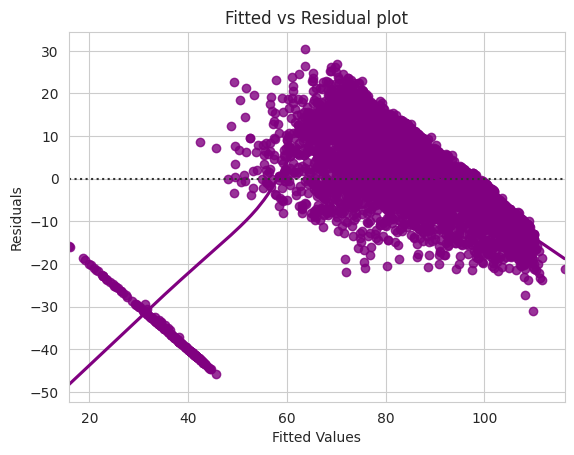

In [119]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=data_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

There is a pattern in the residual vs fitted values, hence we will try to transform the continous variables in the data.

In [120]:
# columns in training set
x_train.columns

Index(['const', 'lread', 'scall', 'exec', 'rchar', 'wchar', 'pgout', 'pflt',
       'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [121]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(data[["usr", "lread", "scall", "exec", "rchar", "wchar", "pgout", "pflt",
       "freemem", "freeswap", "runqsz_Not_CPU_Bound"]])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

From the above pattern, we can see that further transformation can be done for the dependent variable 'usr'. A transformation to the power of 5 for 'usr' is done.


In [122]:
# using transformation to the power of 5 for usr
y_train2 = (y_train["usr"])**5

# let's create a model with the transformed data
olsmod_18 = sm.OLS(y_train2, x_train)
olsres_18 = olsmod_18.fit()
print(olsres_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2163.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:41:23   Log-Likelihood:            -1.2751e+05
No. Observations:                5734   AIC:                         2.551e+05
Df Residuals:                    5723   BIC:                         2.551e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.301e+09 

The adj. R-squared has increased. Let's check the residual plot again. Adjusted R square has increased from 64.1 to 79.0, which is a very huge increase.

In [123]:
# let us recreate the dataframe with actual, fitted and residual values
data_pred = pd.DataFrame()

data_pred["Actual Values"] = y_train2.values.flatten()  # actual values
data_pred["Fitted Values"] = olsres_18.fittedvalues.values  # predicted values
data_pred["Residuals"] = olsres_18.resid.values  # residuals

data_pred.head()

,Actual Values,Fitted Values,Residuals
0,7737809375,7.178093e+09,5.597160e+08
1,656356768,-1.107059e+09,1.763416e+09
2,6590815232,6.518566e+09,7.224886e+07
3,4984209207,7.395780e+09,-2.411571e+09
4,5277319168,6.575776e+09,-1.298456e+09


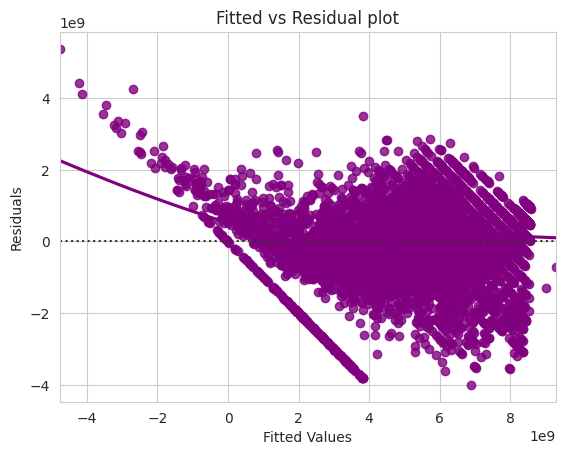

In [124]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=data_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

TEST FOR NORMALITY

Error terms/residuals should be normally distributed.

If the error terms are not normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

What does non-normality indicate?

It suggests that there are a few unusual data points which must be studied closely to make a better model.

How to check the Normality?

It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.

Another test to check for normality is the Shapiro-Wilk test.

How to Make residuals normal?

We can apply transformations like log, exponential, arcsinh, etc as per our data.

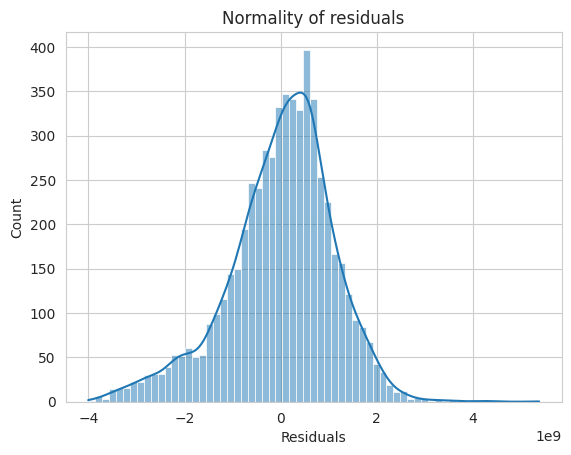

In [125]:
sns.histplot(data_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

The residual terms are almost normally distributed, except for a few points on the left.

The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

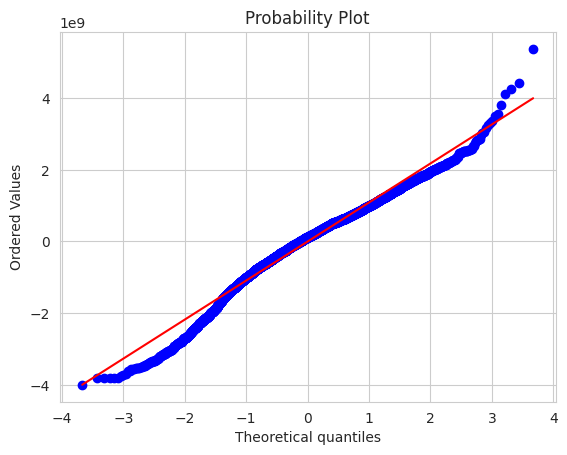

In [126]:
import pylab
import scipy.stats as stats

stats.probplot(data_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Many points are lying on the straight line in QQ plot

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

Null hypothesis - Data is normally distributed.
Alternate hypothesis - Data is not normally distributed.

In [127]:
stats.shapiro(data_pred["Residuals"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9781601428985596, pvalue=8.541513145978866e-29)

Since p-value < 0.05, the residuals are not normal, as per shapiro test.
Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

TEST FOR HOMOSCEDASTICITY
Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Why the test?

The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.
How to check if model has Heteroscedasticity?

Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.
How to deal with Heteroscedasticity?

Can be fixed via adding other important features or making transformations.

The null and alternate hypotheses of the goldfeldquandt test are as follows:

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

In [128]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [129]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(data_pred["Residuals"], x_train)
lzip(name, test)

[('F statistic', 0.9969808068069038), ('p-value', 0.5321955741682427)]

Since p-value > 0.05 we can say that the residuals are homoscedastic.

All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsres_18).

In [130]:
print(olsres_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2163.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:45:35   Log-Likelihood:            -1.2751e+05
No. Observations:                5734   AIC:                         2.551e+05
Df Residuals:                    5723   BIC:                         2.551e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.301e+09 

Observations
R-squared of the model is 0.791 and adjusted R-squared is 0.790, which shows that the model is able to explain ~79% variance in the data. This is good enough.


Predictions

Now, the model can be used for making predictions on the test data.

In [131]:
x_train.columns

Index(['const', 'lread', 'scall', 'exec', 'rchar', 'wchar', 'pgout', 'pflt',
       'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [132]:
x_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [133]:
# dropping columns from the test data that are not there in the training data
x_test2 = x_test.drop(
    ["lwrite", "sread", "swrite", "fork", "ppgout", "pgfree", "pgscan", "atch", "pgin",
       "ppgin", "vflt"], axis=1
)

In [134]:
# let's make predictions on the test set
y_pred = olsres_18.predict(x_test2)

In [135]:
print(y_pred)

5455    6.357135e+09
152     4.092360e+09
6394    7.178988e+09
7509    6.314055e+09
6343    7.298700e+09
            ...     
4081   -1.937185e+09
2098    5.687377e+09
8100    5.823961e+09
4427    3.333641e+09
989     4.088620e+09
Length: 2458, dtype: float64


In [136]:
# let's check on the train data
print("RMSE for train OLS : ", np.sqrt(mean_squared_error(y_train2, data_pred["Fitted Values"])))
print("MAE for train OLS  : ", mean_absolute_error(y_train2, data_pred["Fitted Values"]))
print("R2 for train OLS   : ", r2_score(y_train2, data_pred["Fitted Values"]))

RMSE for train OLS :  1100864151.77311
MAE for train OLS  :  844951691.0657396
R2 for train OLS   :  0.7907720025504168


In [137]:
#power transform test data
y_test2 = y_test["usr"]**5
y_test2.head()

5455    8153726976
152     2535525376
6394    7737809375
7509    3939040643
6343    6590815232
Name: usr, dtype: int64

In [138]:
print("RMSE for test OLS : ", np.sqrt(mean_squared_error(y_test2, y_pred)))
print("MAE for test OLS  : ", mean_absolute_error(y_test2, y_pred))
print("R2 for test OLS   : ", r2_score(y_test2, y_pred))

RMSE for test OLS :  1065854574.2752588
MAE for test OLS  :  815522254.6165146
R2 for test OLS   :  0.8026337457755653


Conclusion / Recommendation:
We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
R square for train and test are comparable. We are getting a R square of 80.2% for the test.
Scale of RMSE and MAE depends on the target variable, as we scaled the target variable by a power of 5 i.e. why RMSE and MAE are also showing high values. But for train and test, these are comparable, which means there is no overfitting problem in the model.
Hence, we can conclude the model "ols_res18" is good for prediction as well as inference purposes.

In [139]:
# let's check the model parameters
olsres_18.params

const                   4.300634e+09
lread                  -3.046103e+06
scall                  -2.912822e+05
exec                   -3.041464e+07
rchar                  -8.793866e+02
wchar                  -1.291962e+03
pgout                  -3.780059e+07
pflt                   -8.769882e+06
freemem                -2.841261e+04
freeswap                2.192503e+03
runqsz_Not_CPU_Bound    5.395169e+08
dtype: float64

In [140]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(x_train.columns)):
    if i == 0:
        print(olsres_18.params[i], "+", end=" ")
    elif i != len(x_train.columns) - 1:
        print(
            olsres_18.params[i],
            "* (",
            x_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_18.params[i], "* (", x_train.columns[i], ")")

usr = 4300634224.578651 + -3046103.4387196465 * ( lread ) +  -291282.2177427411 * ( scall ) +  -30414643.722644746 * ( exec ) +  -879.3865900024477 * ( rchar ) +  -1291.9624959003754 * ( wchar ) +  -37800588.771157466 * ( pgout ) +  -8769882.36471764 * ( pflt ) +  -28412.607429342264 * ( freemem ) +  2192.5030092386014 * ( freeswap ) +  539516947.605248 * ( runqsz_Not_CPU_Bound )


Inferences:
The transformation applied is usr to the power of 5.


*   For 1 unit increase in lread, the usr field decreases by 3046103.4387196465 units.
*   For 1 unit increase in scall, the usr field decreases by 291282.2177427411 units.
*   For 1 unit increase in exec, the usr field decreases by 30414643.722644746 units.
*   For 1 unit increase in rchar, the usr field decreases by 879.3865900024477 units.
*   For 1 unit increase in wchar, the usr field decreases by 1291.9624959003754 units.
*   For 1 unit increase in pgout, the usr field decreases by 37800588.771157466 units.
*   For 1 unit increase in pflt, the usr field decreases by 8769882.36471764 units.
*   For 1 unit increase in freemem, the usr field decreases by 28412.607429342264 units.
*   For 1 unit increase in freeswap, the usr field increases by 2192.5030092386014 units.
*   For 1 unit increase in runqsz_Not_CPU_Bound, the usr field increases by 539516947.605248 units.







The model ols_res18 is suggested, as it follows all the assumptions of Linear Regression (explained in the supporting document namely - Linearity, Independence, Homoscedasticity, Normality of error terms, No Multicollinearity).

The multicollinearity between the dependent variables have been removed and only such variables, whose VIF (Variance Inflation Factor) < 2 have been considered.

There have been 18 models that have been built here, and the 18th model has been considered, as the most apt one to be used in this context. The step by step explaination has been mentioned for each model (above in this document).

The RMSE on the train and test sets are comparable. Therefore, the model is not suffering from overfitting.
The R square values for train and test are comparable. We are getting a R square of 80.2% for the test.
Scale of RMSE and MAE depends on the target variable, as we scaled the target variable by a power of 5 i.e. why RMSE and MAE are also showing high values.
But for train and test, these are comparable, which means there is no overfitting problem in the model.
Hence, we can conclude the model "ols_res18" is good for prediction as well as inference purposes.